In [45]:
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

In [2]:
"""This work will be used to
1-	Read all Experiment Data 
2-	Separate Channels into Matrices (Subject x SignalinTime)
3-	Find breaks in time of the experiment
a.	When an evoked signal started/ended
4-	Break the matrices into experiment moments
a.	Evoked Sound
b.	Evoked Visual
5-	Calculate feature stdvar for each step of experiment in each channel of each subject
6-	Calculate linear correlation between subjects
"""

'This work will be used to\n1-\tRead all Experiment Data \n2-\tSeparate Channels into Matrices (Subject x SignalinTime)\n3-\tFind breaks in time of the experiment\na.\tWhen an evoked signal started/ended\n4-\tBreak the matrices into experiment moments\na.\tEvoked Sound\nb.\tEvoked Visual\n5-\tCalculate feature stdvar for each step of experiment in each channel of each subject\n6-\tCalculate linear correlation between subjects\n'

In [3]:
#Read the files and add to an eegraw vector of EEGLAB objects
class pp:

    def read_eeg(dataset_path):
        """
            Method to read the eeg from a folder, 
            the OS liberary do a crawling on the selected
            folder while mne.io.read_raw_eeglab reads the 
            egg in eeglab format
            
            Args:
                dataset_path = String with dataset path for the images
            
            Return:
                images = List with eegs in eeglab raw format
        """
        eegraw = []
        filename = []
        for path, subdir, files in os.walk(dataset_path):
                for file in files:
                    if file[-3:] == "set":
                        raw = mne.io.read_raw_eeglab(f"{path}/{file}")
                        eegraw.append(raw)
                        filename.append(file)
        
        return eegraw, filename
            
#raw = mne.io.read_raw_eeglab('/Users/viniciussilvestrelourenco/Desktop/eegexperiment/sub-001/eeg/sub-001_task-Experiment_eeg.set', preload=True)


In [4]:
"""
1- Read All Experiment Data Into a main RAW Vector
"""
#Read
dataset_path = "/Users/viniciussilvestrelourenco/Desktop/eegexperiment"
eegraw, filename = pp.read_eeg(dataset_path)

Reading /Users/viniciussilvestrelourenco/Desktop/eegexperiment/sub-010/eeg/sub-010_task-Experiment_eeg.fdt
Reading /Users/viniciussilvestrelourenco/Desktop/eegexperiment/sub-017/eeg/sub-017_task-Experiment_eeg.fdt
Reading /Users/viniciussilvestrelourenco/Desktop/eegexperiment/sub-016/eeg/sub-016_task-Experiment_eeg.fdt
Reading /Users/viniciussilvestrelourenco/Desktop/eegexperiment/sub-011/eeg/sub-011_task-Experiment_eeg.fdt
Reading /Users/viniciussilvestrelourenco/Desktop/eegexperiment/sub-018/eeg/sub-018_task-Experiment_eeg.fdt
Reading /Users/viniciussilvestrelourenco/Desktop/eegexperiment/sub-002/eeg/sub-002_task-Experiment_eeg.fdt
Reading /Users/viniciussilvestrelourenco/Desktop/eegexperiment/sub-005/eeg/sub-005_task-Experiment_eeg.fdt
Reading /Users/viniciussilvestrelourenco/Desktop/eegexperiment/sub-004/eeg/sub-004_task-Experiment_eeg.fdt
Reading /Users/viniciussilvestrelourenco/Desktop/eegexperiment/sub-003/eeg/sub-003_task-Experiment_eeg.fdt
Reading /Users/viniciussilvestreloure

In [5]:
# Test if Read Worked
eegraw[3].info

<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 32 items (32 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 256.0 Hz
>

Effective window size : 8.000 (s)


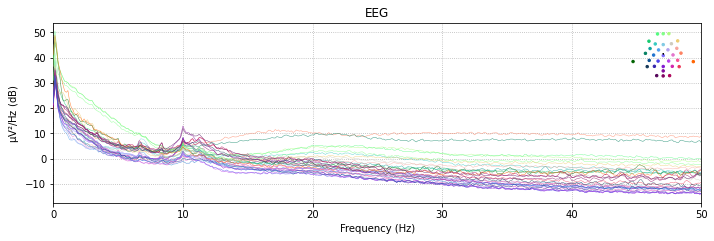

Using matplotlib as 2D backend.


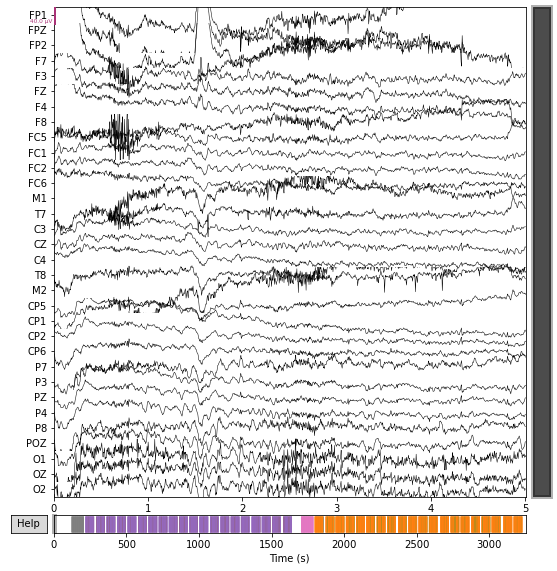

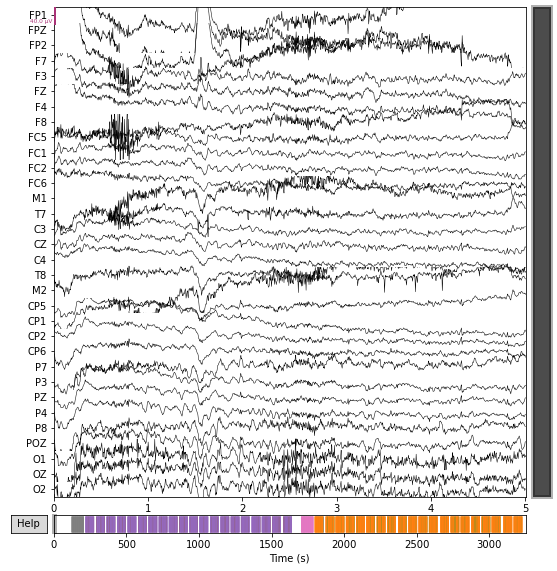

In [6]:
#Plotting
eegraw[1].plot_psd(fmax=50)
eegraw[1].plot(duration=5, n_channels=32)

In [7]:
#Test if file name saver worked:
subject = []
for file in filename:
    print(file)
    subject.append(file[5:7])

for subj in subject:
    print(subj)

sub-010_task-Experiment_eeg.set
sub-017_task-Experiment_eeg.set
sub-016_task-Experiment_eeg.set
sub-011_task-Experiment_eeg.set
sub-018_task-Experiment_eeg.set
sub-002_task-Experiment_eeg.set
sub-005_task-Experiment_eeg.set
sub-004_task-Experiment_eeg.set
sub-003_task-Experiment_eeg.set
sub-014_task-Experiment_eeg.set
sub-013_task-Experiment_eeg.set
sub-012_task-Experiment_eeg.set
sub-015_task-Experiment_eeg.set
sub-006_task-Experiment_eeg.set
sub-001_task-Experiment_eeg.set
sub-008_task-Experiment_eeg.set
sub-009_task-Experiment_eeg.set
sub-007_task-Experiment_eeg.set
10
17
16
11
18
02
05
04
03
14
13
12
15
06
01
08
09
07


In [8]:
#Find Index of each Subject number
index = []
i=1
while i <= len(subject):
    j=0
    for subj in subject:
        if i < 10:
            k = f'0{i}'
            if subj == k:
                index.append(j)
                print(j)
            else:
                j+=1
        else:
            if subj == str(i):
                index.append(j)
                print(j)
            else:
                j+=1
    i+=1
    
# Index[0] is the index position of subject 01.

14
5
8
7
6
13
17
15
16
0
3
11
10
9
12
2
1
4


In [9]:
"""
2- Separate Channels into Matrices
"""
#Build a Channels Dictionary
chn_dict = {
    1: "FP1",
    2: "FPZ",
    3: "FP2",
    4: "F7",
    5: "F3",
    6: "FZ",
    7: "F4",
    8: "F8",
    9: "FC5",
    10: "FC1",
    11: "FC2",
    12: "FC6",
    13: "M1",
    14: "T7",
    15: "C3",
    16: "CZ",
    17: "C4",
    18: "T8",
    19: "M2",
    20: "CP5",
    21: "CP1",
    22: "CP2",
    23: "CP6",
    24: "P7",
    25: "P3",
    26: "PZ",
    27: "P4",
    28: "P8",
    29: "POZ",
    30: "O1",
    31: "OZ",
    32: "O2"
}

In [10]:
#Create Matrix Subject x Channel

matrix = [[0 for x in range(len(chn_dict))] for y in range(len(subject))]
np.shape(matrix)

(18, 32)

In [11]:
#Select 1 channel 
chn_dict[index[1]]

'F3'

In [12]:
#Isolate 1 channel

## Copy Channel names list into a vector
ch_list = eegraw[1].ch_names.copy()
print(ch_list)
sub0 = eegraw[0].copy()

## Remove all Channels except the desired one from the subject data

## Remove the desired channel from the list
"""
ch_list.remove(chn_dict[1])
print(ch_list)


print('Number of channels in subject:')
print(len(sub0.ch_names), end=' → drop to 1 → ')
sub0.drop_channels(ch_list)
print(len(sub0.ch_names))
print(sub0.ch_names)
"""

#Other Possibility is to use pick_channels and select the desired one directly
sub0.pick_channels([chn_dict[2]])
print(sub0.ch_names)

['FP1', 'FPZ', 'FP2', 'F7', 'F3', 'FZ', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'M1', 'T7', 'C3', 'CZ', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'PZ', 'P4', 'P8', 'POZ', 'O1', 'OZ', 'O2']
['FPZ']


In [13]:
print(sub0)

<RawEEGLAB | sub-010_task-Experiment_eeg.fdt, 1 x 841958 (3288.9 s), ~19 kB, data not loaded>


(array([[-0.01234892, -0.01235244, -0.01235169, ..., -0.01319556,
        -0.01319962, -0.01319832]]), array([0.00000000e+00, 3.90625000e-03, 7.81250000e-03, ...,
       3.28888672e+03, 3.28889062e+03, 3.28889453e+03]))


Text(0.5, 1.0, 'Plot of channel 0')

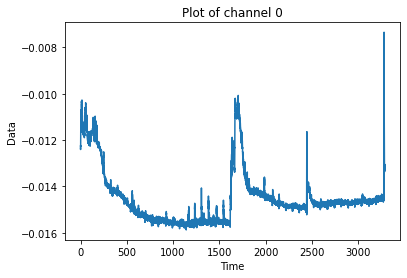

In [14]:
# Extracting Data from the Isolated Channel for 1 Subject

sampling_freq = sub0.info['sfreq']
start_stop_seconds = np.array([0, 3288.9])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index = 0
raw_selection = sub0[channel_index, start_sample:stop_sample]
print(raw_selection)

## Plotting the extracted data

### time dimension
x = raw_selection[1]

### data dimension
y = raw_selection[0].T
plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Plot of channel 0')

In [15]:
# Fulfill Matrix
"""
Method to create a matrix of subjects x channels
extract the information from eeglab files and then
fulfill the matrix that will be used later

Args:
    eegraw = list with eeglab raw data for each subject
    index  = Position of a given subject data in the eegraw file in crescent order of subjects (from 0 up to 18)
    subject = list with 
    

Return:
    matrix = [subject][channels] numpy array containing EEG channels data
"""

verbose = 0

#Create matrix to be fulfilled
matrix = [[0 for x in range(len(chn_dict))] for y in range(len(index))]
if verbose == 1:
    print(np.shape(matrix))

#Iterate over subjects i and channels j 
i=0
j=1

while i < len(index):
    while j <= len(chn_dict):
        k = j-1
        #Copy Index Raw
        subraw = eegraw[index[i]].copy()
        if verbose ==1:
            print(subraw.info)
        
        #Pick Desired Channel
        subraw.pick_channels([chn_dict[j]])
        if verbose == 1:
            print(subraw.ch_names)
        
        #Isolate data into raw_selection
        sampling_freq = subraw.info['sfreq']
        start_stop_seconds = np.array([0, 5000])
        start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
        channel_index = 0
        raw_selection = subraw[channel_index, start_sample:stop_sample]
        
        if verbose == 1:
            print(raw_selection)
        
        matrix[i][k] = raw_selection
        
        ###Plot extracted data
        #### time dimension
        #x = raw_selection[1]
        #
        #### data dimension
        #y = raw_selection[0].T
        #plt.plot(x, y)
        #plt.xlabel('Time')
        #plt.ylabel('Data')
        #plt.title('Plot of channel 0')
        j+=1
    j=1
    i+=1
    

(18, 32)
<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 32 items (32 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 256.0 Hz
>
['FP1']
(array([[-0.00064573, -0.00067683, -0.00066609, ...,  0.00224158,
         0.00218458,  0.00227946]]), array([0.00000000e+00, 3.90625000e-03, 7.81250000e-03, ...,
       3.38798047e+03, 3.38798438e+03, 3.38798828e+03]))
<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 32 items (32 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 256.0 Hz
>
['FPZ']
(array([[0.00245912, 0.00245229, 0.00245089, ..., 0.00502671, 0.00501106,
        0.00503064]]), array([0.00000000e+00, 3.90625000e-03, 7.81250000e-03, ...,
       3.38798047e+03, 3.38798438e+0

In [26]:
print(np.std(matrix[1][2][0]))
verbose = 1

0.0017279012695742507


In [42]:
#Calculate a Matrix of the Standard Deviatons from the Subject x Channels data 

## Define a std_matrix with shape (#subjects x #channels)
std_matrix = np.zeros((int(len(matrix)),int(len(matrix[0]))))
if verbose = 1:
    print(np.shape(std_matrix)[0])

## Loop through the matrix calculating the stdev of each channel for each subject
i = 0
while i < np.shape(std_matrix)[0]:
    j = 0
    while j < np.shape(std_matrix)[1]:
        std_matrix[i][j] = np.std(matrix[i][j][0])
        if verbose == 1:
            print(f'i = {i} , j = {j} , {std_matrix[i][j]}')
        j+=1
    i+=1

18
i = 0 , j = 0 , 0.000888126950962818
i = 0 , j = 1 , 0.0008229907658629602
i = 0 , j = 2 , 0.0006315030627946208
i = 0 , j = 3 , 0.003053685575890449
i = 0 , j = 4 , 0.00044514602906828803
i = 0 , j = 5 , 0.000313069348797437
i = 0 , j = 6 , 0.0010004148792667669
i = 0 , j = 7 , 0.0003689196108747558
i = 0 , j = 8 , 0.00019415553067073942
i = 0 , j = 9 , 0.00024082208426243177
i = 0 , j = 10 , 0.0011196154680641348
i = 0 , j = 11 , 0.0009325682896263041
i = 0 , j = 12 , 0.001976991835330983
i = 0 , j = 13 , 0.002078077253115497
i = 0 , j = 14 , 0.0008439411224159214
i = 0 , j = 15 , 0.0004892292348229564
i = 0 , j = 16 , 0.0011677740770454084
i = 0 , j = 17 , 0.00034618633412959943
i = 0 , j = 18 , 0.0029229083606319432
i = 0 , j = 19 , 0.002052831352276825
i = 0 , j = 20 , 0.0004936113328334336
i = 0 , j = 21 , 0.001648140362320403
i = 0 , j = 22 , 0.0005066492532178064
i = 0 , j = 23 , 0.0010453280273355285
i = 0 , j = 24 , 0.0003522527749026019
i = 0 , j = 25 , 0.0009344631436443

In [106]:
#Calculate Correlation between 2 vectors
   
a = [1,4,6,5]
b = [1,2,3,4]   
print(pearsonr(a,b))

#Calculate Correlation between 2 channels

print(pearsonr(matrix[1][1][0][0], matrix[1][31][0][0]))


(0.8366600265340756, 0.16333997346592444)
(0.05363395916281821, 0.0)
